## Exploratory analysis of Omar's fourth (balanced) iteration of our manually annotated dataset

Download dataset (V4) csv file

In [39]:
# check metadata csv file (dataset-v4.csv) is in google drive

# mount google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# peek contents of dataset-v4.csv
!head /content/drive/MyDrive/team_challenge/dataset-v4.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,labels,subset
0,4024,10,Clover,2024-07-16T12:15:40.960299Z,87231,OV3XXX_1_582_970.jpg,5.152,2024-07-16T12:15:40.960318Z,['Clover'],Train
1,19621,1,"{""choices"":[""Grass"",""Dung""]}",2024-07-26T17:43:59.440503Z,52689,Cow Dung_Livia_378_582_194.jpg,1.443,2024-07-26T17:43:59.440522Z,"['Grass', 'Dung']",Train
2,16876,3,"{""choices"":[""Clover"",""Grass""]}",2024-07-23T10:57:48.626335Z,50010,Clover_Stev_348_1552_776.jpg,1.23,2024-07-23T10:57:48.626352Z,"['Clover', 'Grass']",Train
3,14621,5,"{""choices"":[""Grass"",""Soil""]}",2024-07-18T16:26:16.223214Z,19317,Bare Soil_Maxwell_16_388_582.jpg,1.345,2024-07-18T16:26:16.223233Z,"['Grass', 'Soil']",Train
4,12780,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T16:51:30.637064Z,113179,More Clover_13_1312_1164.jpg,1.319,2024-07-17T16:51:30.637

Generate dataframe

In [40]:
# Generate df and make image_name column

import pandas as pd

csv_path = "/content/drive/MyDrive/team_challenge/dataset-v4.csv"
main_df = pd.read_csv(csv_path)
main_df['image_name'] = main_df['image'].apply(lambda x: x.split('/')[-1].replace('%20', ' ')) # Ensure URL encoded spaces are replaced

main_df

,Unnamed: 0,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at,labels,subset,image_name
0,0,4024,10,Clover,2024-07-16T12:15:40.960299Z,87231,OV3XXX_1_582_970.jpg,5.152,2024-07-16T12:15:40.960318Z,['Clover'],Train,OV3XXX_1_582_970.jpg
1,1,19621,1,"{""choices"":[""Grass"",""Dung""]}",2024-07-26T17:43:59.440503Z,52689,Cow Dung_Livia_378_582_194.jpg,1.443,2024-07-26T17:43:59.440522Z,"['Grass', 'Dung']",Train,Cow Dung_Livia_378_582_194.jpg
2,2,16876,3,"{""choices"":[""Clover"",""Grass""]}",2024-07-23T10:57:48.626335Z,50010,Clover_Stev_348_1552_776.jpg,1.230,2024-07-23T10:57:48.626352Z,"['Clover', 'Grass']",Train,Clover_Stev_348_1552_776.jpg
3,3,14621,5,"{""choices"":[""Grass"",""Soil""]}",2024-07-18T16:26:16.223214Z,19317,Bare Soil_Maxwell_16_388_582.jpg,1.345,2024-07-18T16:26:16.223233Z,"['Grass', 'Soil']",Train,Bare Soil_Maxwell_16_388_582.jpg
4,4,12780,5,"{""choices"":[""Clover"",""Grass""]}",2024-07-17T16:51:30.637064Z,113179,More Clover_13_1312_1164.jpg,1.319,2024-07-17T16:51:30.637082Z,"['Clover', 'Grass']",Train,More Clover_13_1312_1164.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
2886,2886,189,3,"{""choices"":[""Grass"",""Dung""]}",2024-07-11T10:03:33.844396Z,93550,Sheep Dung_Livia_837_582_388.jpg,4.678,2024-07-11T10:03:33.844426Z,"['Grass', 'Dung']",Train,Sheep Dung_Livia_837_582_388.jpg
2887,2887,13617,12,"{""choices"":[""Grass"",""Dung""]}",2024-07-18T09:19:45.344062Z,57523,Cow Dung_Stev_432_1312_1164.jpg,852.126,2024-07-18T09:19:45.344080Z,"['Grass', 'Dung']",Train,Cow Dung_Stev_432_1312_1164.jpg
2888,2888,11880,12,"{""choices"":[""Grass"",""Dung""]}",2024-07-17T15:19:44.796236Z,55015,Cow Dung_Livia_405_1164_0.jpg,1.928,2024-07-17T15:19:44.796254Z,"['Grass', 'Dung']",Train,Cow Dung_Livia_405_1164_0.jpg
2889,2889,2284,2,"{""choices"":[""Grass"",""Dung""]}",2024-07-14T13:03:38.691054Z,51060,Cow Dung_Fran_359_970_388.jpg,1.478,2024-07-14T13:03:38.691072Z,"['Grass', 'Dung']",Val,Cow Dung_Fran_359_970_388.jpg


In [41]:
# show label combinations

from ast import literal_eval # for converting the strings in the 'labels' column into lists

all_combinations = set(main_df['labels'].apply(literal_eval).apply(tuple))
all_combinations


{('Clover',),
 ('Clover', 'Grass'),
 ('Clover', 'Grass', 'Dung'),
 ('Clover', 'Grass', 'Dung', 'Soil'),
 ('Clover', 'Grass', 'Soil'),
 ('Clover', 'Soil'),
 ('Dung',),
 ('Dung', 'Soil'),
 ('Grass', 'Dung'),
 ('Grass', 'Dung', 'Soil'),
 ('Grass', 'Soil'),
 ('Soil',)}

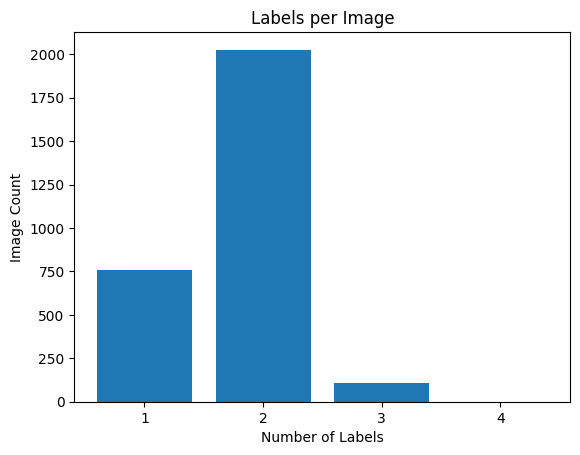

In [42]:
# Determine distribution of images with multiple labels

import matplotlib.pyplot as plt

main_df['label_count'] = main_df['labels'].apply(literal_eval).apply(len)

label_count_freq = main_df['label_count'].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(label_count_freq.index, label_count_freq.values)

ax.set_xlabel('Number of Labels')
ax.set_ylabel('Image Count')
ax.set_title('Labels per Image')

ax.set_xticks(label_count_freq.index)
ax.set_xticklabels(label_count_freq.index)

plt.show()

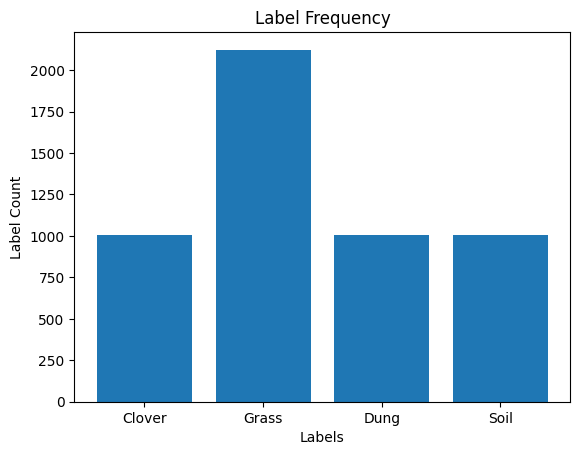

In [43]:
# Plot frequency of each of the possible labels

from collections import Counter

all_labels = [label for sublist in main_df['labels'].apply(literal_eval) for label in sublist]

label_freq = Counter(all_labels)

label_freq_df = pd.DataFrame.from_dict(label_freq, orient='index', columns=['Frequency'])

fig, ax = plt.subplots()
ax.bar(label_freq_df.index, label_freq_df['Frequency'])

ax.set_xlabel('Labels')
ax.set_ylabel('Label Count')
ax.set_title('Label Frequency')

plt.show()

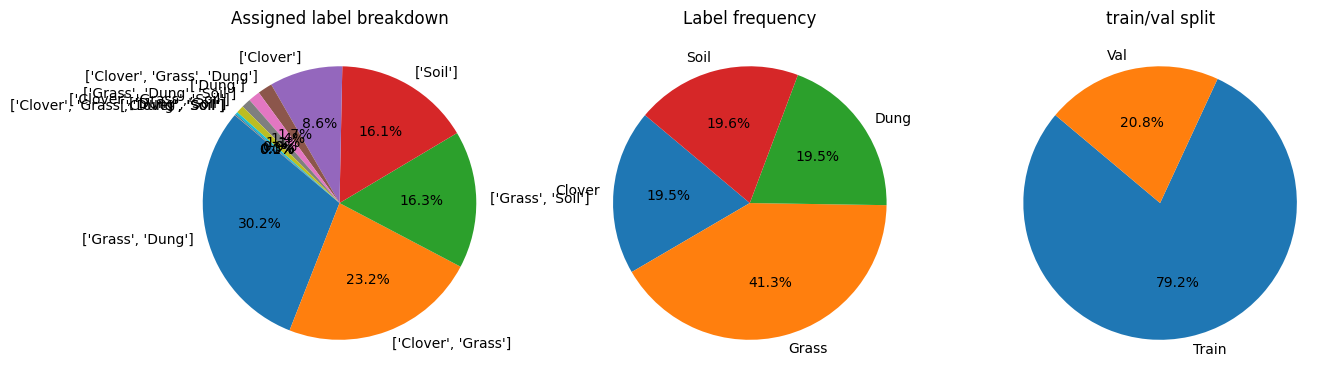

In [48]:
# view distribution of assigned labels & their frequency (i.e. total occurrances of each label)

import matplotlib.pyplot as plt
from collections import Counter

choice_counts = main_df['labels'].apply(literal_eval).value_counts()

flattened_label_list = [label for sublist in main_df['labels'].apply(literal_eval) for label in sublist]
label_counts = Counter(flattened_label_list)

split_counts = main_df['subset'].value_counts()

fig, axs = plt.subplots(1,3, figsize=(15, 10))

axs[0].pie(choice_counts, labels=choice_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title("Assigned label breakdown")

axs[1].pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=140)
axs[1].set_title("Label frequency")

axs[2].pie(split_counts, labels=split_counts.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title("train/val split")

plt.show()